In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
disease_df = pd.read_csv("framingham.csv")
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
disease_df.drop(columns=['education'], inplace = True, axis = 1)
disease_df.rename(columns={'male':'Sex_male'}, inplace=True)
disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
disease_df.dropna(axis=0, inplace=True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [6]:
disease_df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

In [7]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df[['TenYearCHD']])
X

array([[ 39. ,   1. ,   0. , 195. , 106. ,  77. ],
       [ 46. ,   0. ,   0. , 250. , 121. ,  76. ],
       [ 48. ,   1. ,  20. , 245. , 127.5,  70. ],
       ...,
       [ 52. ,   0. ,   0. , 269. , 133.5, 107. ],
       [ 40. ,   1. ,   0. , 185. , 141. ,  72. ],
       [ 39. ,   0. ,  30. , 196. , 133. ,  80. ]], shape=(3751, 6))

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.23390951,  1.11629198, -0.75552698, -0.93997111, -1.19619549,
        -0.20436458],
       [-0.4170173 , -0.89582297, -0.75552698,  0.29305664, -0.51572536,
        -0.24624229],
       [-0.18361952,  1.11629198,  0.9218319 ,  0.18096321, -0.22085497,
        -0.49750858],
       ...,
       [ 0.28317603, -0.89582297, -0.75552698,  0.71901168,  0.05133307,
         1.05196682],
       [-1.11721063,  1.11629198, -0.75552698, -1.16415797,  0.39156814,
        -0.41375315],
       [-1.23390951, -0.89582297,  1.76051134, -0.91755243,  0.02865074,
        -0.07873144]], shape=(3751, 6))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625, 1)
Test set: (1126, 6) (1126, 1)


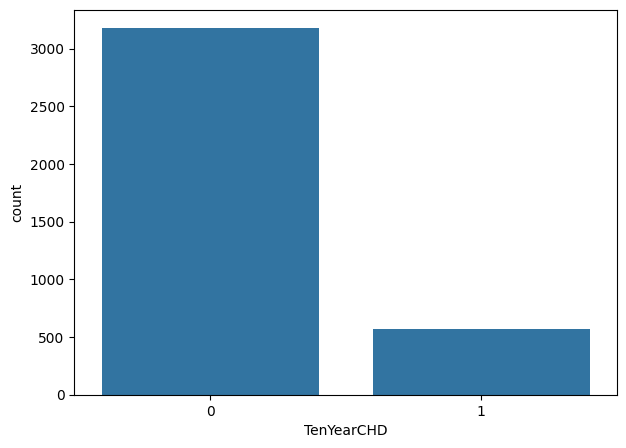

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data = disease_df)

plt.show()

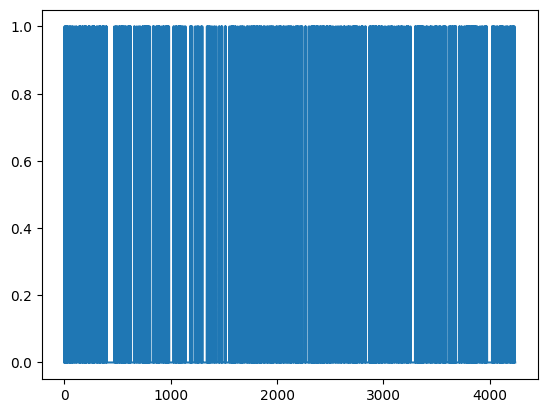

In [11]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train.squeeze())
y_pred = logreg.predict(X_test)

In [13]:
print(f"Accuracy score: {sklearn.metrics.accuracy_score(y_test.squeeze(), y_pred):.4f}")

Accuracy score: 0.8490


In [14]:
print("Details for confusion matrix:")
print(sklearn.metrics.classification_report(y_test, y_pred))

Details for confusion matrix:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[942,   9],
       [161,  14]])

In [18]:
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted : 0', 'Predicted : 1'],
                           index = ['Actual : 0', 'Actual : 1'])
conf_matrix

,Predicted : 0,Predicted : 1
Actual : 0,942,9
Actual : 1,161,14


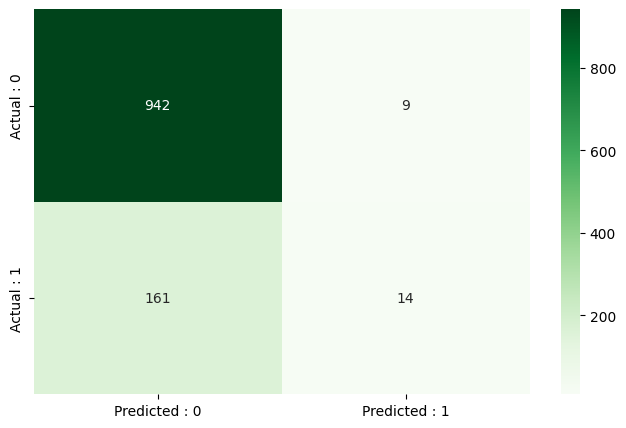

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')

plt.show()